In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from sklearn.datasets import load_iris
X,Y = load_iris( return_X_y=True)
Y = Y[0:100]

In [ ]:
Y1 = []
for i in range(len(Y)):
  if Y[i] == 0:
    Y1.append(-1)
  elif Y[i] == 1:
    Y1.append(1)
    
Y1 = np.array(Y1)

In [ ]:
X1 = np.hstack((X[0:100],np.ones(100).reshape(100,1)))
print(X1.shape)
print(Y1.shape)



(100, 5)
(100,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size = 0.3,shuffle = True,random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(70, 5)
(30, 5)
(70,)
(30,)


# Hard SVM Using Dual Formulation (cvxopt_solvers.qp)




In [ ]:
#Linear Kernel
def linear_kernel(x1,x2):
    return np.dot(x1, x2.T)

In [ ]:
X_sep = x_train
Y_sep = y_train
print(X_sep.shape)
print(Y_sep.shape)

(70, 5)
(70,)


In [ ]:
from cvxopt import matrix,solvers
phi = linear_kernel(y_train.reshape(-1,1)*x_train,y_train.reshape(-1,1)*x_train) 
P=matrix(phi)
q = matrix(-np.ones(len(x_train)).reshape(len(x_train),1))  
h = matrix(np.zeros(len(x_train))) 
g = -np.identity(len(x_train)) 
G = matrix(g) 
A = matrix(y_train.reshape(1,-1).astype(float))
b = matrix(np.zeros(1))

In [ ]:
sol=solvers.qp(P=P,G=G,h=h,q=q,A=A,b=b)

     pcost       dcost       gap    pres   dres
 0: -2.7002e+00 -4.8935e+00  1e+02  1e+01  2e+00
 1: -1.0501e+00 -1.9972e+00  1e+01  7e-01  1e-01
 2: -3.3980e-01 -1.2216e+00  1e+00  8e-03  1e-03
 3: -5.4549e-01 -7.7444e-01  2e-01  2e-03  3e-04
 4: -6.4485e-01 -8.0322e-01  2e-01  5e-04  7e-05
 5: -7.3077e-01 -7.5458e-01  2e-02  6e-05  9e-06
 6: -7.4775e-01 -7.4813e-01  4e-04  7e-07  9e-08
 7: -7.4805e-01 -7.4806e-01  4e-06  7e-09  9e-10
 8: -7.4806e-01 -7.4806e-01  4e-08  7e-11  9e-12
Optimal solution found.


In [ ]:
print(sol['x'])

[ 1.61e-09]
[ 1.16e-09]
[ 3.09e-10]
[ 9.83e-10]
[ 1.71e-09]
[ 1.33e-09]
[ 3.06e-10]
[ 3.05e-10]
[ 7.99e-10]
[ 7.26e-10]
[ 1.06e-09]
[ 1.91e-09]
[ 1.21e-09]
[ 4.07e-10]
[ 1.10e-09]
[ 9.10e-10]
[ 6.29e-10]
[ 4.04e-09]
[ 3.67e-10]
[ 6.93e-10]
[ 1.83e-07]
[ 1.92e-09]
[ 9.55e-10]
[ 1.13e-09]
[ 1.90e-09]
[ 2.86e-10]
[ 1.01e-09]
[ 8.43e-10]
[ 8.17e-10]
[ 3.92e-10]
[ 2.59e-10]
[ 3.94e-10]
[ 2.53e-10]
[ 1.54e-09]
[ 2.53e-10]
[ 4.25e-10]
[ 1.03e-09]
[ 2.85e-10]
[ 3.57e-10]
[ 3.31e-10]
[ 1.02e-09]
[ 7.67e-02]
[ 2.63e-10]
[ 9.47e-10]
[ 7.48e-01]
[ 2.10e-09]
[ 2.98e-10]
[ 8.05e-10]
[ 3.53e-10]
[ 4.68e-10]
[ 2.61e-10]
[ 3.15e-10]
[ 8.09e-10]
[ 2.46e-09]
[ 1.58e-09]
[ 2.18e-10]
[ 1.04e-09]
[ 9.29e-10]
[ 6.71e-01]
[ 2.78e-10]
[ 2.75e-10]
[ 3.26e-10]
[ 2.45e-10]
[ 4.85e-10]
[ 2.16e-09]
[ 6.60e-10]
[ 4.19e-10]
[ 7.26e-10]
[ 4.11e-10]
[ 2.90e-10]



In [ ]:
alphas = np.array(sol['x']) # return alphas

compared_alphas = [alphas > 1e-7] 

print("number_support_vectors:",np.sum(compared_alphas))
support_vector_idx = (alphas > 1e-7).flatten()
sv = x_train[support_vector_idx]
sv_y = y_train[support_vector_idx]
sv_alphas = alphas[support_vector_idx]

weights = []
for i in range(len(x_train)):
  weights.append(x_train[i]*y_train[i]*alphas[i][0])


weights = np.sum(np.array(weights),axis=0).reshape(-1,1)
print(weights)
bias = sv_y.reshape(len(sv_y),1) - np.matmul(sv,weights)
bias = bias[0] 
print(bias)




number_support_vectors: 4
[[ 4.60343900e-02]
 [-5.21722483e-01]
 [ 1.00316482e+00]
 [ 4.64179589e-01]
 [-2.63029863e-17]]
[-1.44595771]


In [ ]:
pred = np.sum(linear_kernel(sv, x_train) * sv_alphas * sv_y.reshape(sv_y.shape[0],1), axis=0) + bias
y_pred_train = np.sign(pred)

correct = 0
incorrect = 0

for i in range(len(y_pred_train)):
  if y_pred_train[i] == y_train[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)

from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train, y_pred = y_pred_train))
TN, FP, FN, TP = confusion_matrix(y_train, y_pred_train).ravel()
training_accuracy = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy:",training_accuracy*100,"%")
print(accuracy_score(y_true = y_train, y_pred = y_pred_train))



70
0
confusion_matrix:
 [[33  0]
 [ 0 37]]
33 0 0 37
training accuracy: 100.0 %
1.0


In [ ]:
pred = np.sum(linear_kernel(sv, x_test) * sv_alphas * sv_y.reshape(sv_y.shape[0],1), axis=0) + bias
y_pred_test = np.sign(pred)

correct = 0
incorrect = 0

for i in range(len(y_pred_test)):
  if y_pred_test[i] == y_test[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)

from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test, y_pred = y_pred_test))
TN, FP, FN, TP = confusion_matrix(y_test, y_pred_test).ravel()
testing_accuracy = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy:",testing_accuracy*100,"%")
print(accuracy_score(y_true = y_test, y_pred = y_pred_test))


30
0
confusion_matrix:
 [[17  0]
 [ 0 13]]
17 0 0 13
testing accuracy: 100.0 %
1.0


In [ ]:
max_margin_distance = 2 / np.linalg.norm(weights)

print("max_margin_distance",max_margin_distance)
print("postive_margin_distance, negative_margin_distance:",max_margin_distance/2)

print("support_vectors:",sv)

max_margin_distance 1.6351115307261888
postive_margin_distance, negative_margin_distance: 0.8175557653630944
support_vectors: [[4.8 3.4 1.9 0.2 1. ]
 [4.5 2.3 1.3 0.3 1. ]
 [5.1 2.5 3.  1.1 1. ]
 [5.1 3.3 1.7 0.5 1. ]]


# Soft SVM Using Dual Formulation (cvxopt_solvers.qp)




In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

BreastCancer = pd.read_csv("/content/BreastCancer.csv")
BreastCancer = BreastCancer.drop(['Unnamed: 32'], axis=1)
X1 = BreastCancer.iloc[:,2:].values
Y = BreastCancer.iloc[:,1].values

scaler = StandardScaler()
#### scaler = MinMaxScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)



X1 = np.hstack((X1,np.ones(len(X1)).reshape(len(X1),1)))
Y1 = []
for i in range(len(Y)):
  if Y[i] == 'M':
    Y1.append(-1)
  elif Y[i] == 'B':
    Y1.append(1)
    
Y1 = np.array(Y1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size = 0.2,shuffle = True,random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(455, 31)
(455,)
(114, 31)
(114,)


In [ ]:
BreastCancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
BreastCancer.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#Linear Kernel
def linear_kernel(x1,x2):
    return np.dot(x1, x2.T)

**Regularization parameter = 0.1**

In [ ]:
from cvxopt import matrix,solvers
C_regularization_parameter = 0.1
phi = linear_kernel(y_train.reshape(-1,1)*x_train,y_train.reshape(-1,1)*x_train)  # kernel
P = matrix(phi)
q = matrix(-np.ones(len(x_train)).reshape(len(x_train),1)) # coefficients of alpha_i 
h = matrix(np.hstack((np.zeros(len(x_train)),np.ones(len(x_train))*C_regularization_parameter))) # RHS of 0 <= alpha <= C
g = np.vstack((-np.identity(len(x_train)),np.identity(len(x_train)))) # LHS of  0 <= alpha <= C
G = matrix(g)
A = matrix(y_train.reshape(1,-1).astype(float))
b = matrix(np.zeros(1))

In [ ]:
sol=solvers.qp(P=P,q=q,G=G,h=h,A=A,b=b)

     pcost       dcost       gap    pres   dres
 0: -5.3199e+01 -8.5783e+01  3e+03  2e+01  6e-14
 1: -1.0840e+01 -7.8855e+01  2e+02  2e+00  4e-14
 2: -7.3600e+00 -5.2311e+01  1e+02  6e-01  2e-14
 3: -4.8008e+00 -2.4938e+01  3e+01  1e-01  6e-15
 4: -3.7206e+00 -1.0954e+01  1e+01  5e-02  3e-15
 5: -3.3812e+00 -5.3502e+00  3e+00  1e-02  3e-15
 6: -3.5338e+00 -4.0886e+00  7e-01  2e-03  3e-15
 7: -3.6216e+00 -3.7412e+00  1e-01  2e-04  3e-15
 8: -3.6559e+00 -3.6812e+00  3e-02  2e-05  3e-15
 9: -3.6647e+00 -3.6694e+00  5e-03  3e-06  2e-15
10: -3.6667e+00 -3.6668e+00  9e-05  2e-08  3e-15
11: -3.6667e+00 -3.6668e+00  1e-06  3e-10  3e-15
Optimal solution found.


In [ ]:
print(sol)

{'x': <455x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <910x1 matrix, tc='d'>, 'z': <910x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 1.3533037704621816e-06, 'relative gap': 3.690744858184732e-07, 'primal objective': -3.666749727933767, 'dual objective': -3.6667510615338763, 'primal infeasibility': 2.623357659985808e-10, 'dual infeasibility': 3.1923222571637324e-15, 'primal slack': 7.773534244370518e-11, 'dual slack': 1.1285744005252276e-08, 'iterations': 11}


In [ ]:
print(sol['x'])


[ 3.34e-02]
[ 1.52e-10]
[ 2.72e-10]
[ 3.23e-09]
[ 3.44e-10]
[ 4.12e-10]
[ 5.55e-10]
[ 4.80e-10]
[ 9.41e-10]
[ 4.09e-10]
[ 8.84e-09]
[ 2.34e-10]
[ 5.98e-10]
[ 5.63e-10]
[ 7.28e-10]
[ 2.42e-10]
[ 1.83e-10]
[ 2.73e-10]
[ 1.25e-09]
[ 6.58e-10]
[ 1.71e-09]
[ 1.11e-09]
[ 1.00e-01]
[ 9.50e-10]
[ 1.00e-01]
[ 6.69e-10]
[ 6.51e-10]
[ 1.81e-10]
[ 3.41e-10]
[ 3.54e-10]
[ 1.06e-09]
[ 5.85e-10]
[ 2.91e-10]
[ 2.78e-10]
[ 1.00e-01]
[ 4.75e-10]
[ 8.88e-02]
[ 4.10e-10]
[ 3.01e-10]
[ 1.53e-09]
[ 6.53e-10]
[ 1.10e-10]
[ 3.91e-10]
[ 3.75e-10]
[ 1.26e-09]
[ 3.24e-10]
[ 1.75e-10]
[ 4.78e-10]
[ 4.81e-10]
[ 6.91e-10]
[ 1.28e-07]
[ 5.42e-10]
[ 5.87e-10]
[ 1.00e-01]
[ 3.43e-10]
[ 1.34e-09]
[ 1.55e-09]
[ 6.36e-10]
[ 5.77e-10]
[ 2.02e-08]
[ 7.27e-10]
[ 2.35e-09]
[ 1.00e-01]
[ 3.33e-09]
[ 6.78e-10]
[ 1.67e-09]
[ 1.23e-08]
[ 2.62e-09]
[ 4.68e-10]
[ 2.22e-09]
[ 5.02e-10]
[ 4.72e-09]
[ 1.00e-01]
[ 4.93e-09]
[ 1.84e-09]
[ 6.17e-10]
[ 2.32e-10]
[ 1.07e-09]
[ 6.62e-10]
[ 3.58e-10]
[ 5.21e-10]
[ 2.83e-09]
[ 1.00e-01]
[ 4.

In [ ]:
alphas = np.array(sol['x']) # return alphas

compared_alphas = [alphas > 1e-4] 
# print(len(compared_alphas[0]))

support_vector_idx = (alphas > 1e-4).flatten()
sv = x_train[support_vector_idx]
sv_y = y_train[support_vector_idx]
sv_alphas = alphas[support_vector_idx]

print("number_support_vectors:",len(sv_alphas))


weights = []
for i in range(len(x_train)):
  weights.append(x_train[i]*y_train[i]*alphas[i][0])

weights = np.sum(np.array(weights),axis=0).reshape(-1,1)
bias = sv_y.reshape(len(sv_y),1) - np.matmul(sv,weights)
bias = bias[0]
print(bias)


number_support_vectors: 54
[0.26901377]


In [ ]:
pred = np.sum(linear_kernel(sv, x_train) * sv_alphas * sv_y.reshape(sv_y.shape[0],1), axis=0) + bias
y_pred_train = np.sign(pred)

correct = 0
incorrect = 0

for i in range(len(y_pred_train)):
  if y_pred_train[i] == y_train[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)

from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train, y_pred = y_pred_train))
TN, FP, FN, TP = confusion_matrix(y_train, y_pred_train).ravel()
training_accuracy = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy:",training_accuracy*100,"%")
print(accuracy_score(y_true = y_train, y_pred = y_pred_train))


447
8
confusion_matrix:
 [[163   6]
 [  2 284]]
163 6 2 284
training accuracy: 98.24175824175823 %
0.9824175824175824


In [ ]:
pred = np.sum(linear_kernel(sv, x_test) * sv_alphas * sv_y.reshape(sv_y.shape[0],1), axis=0) + bias
y_pred_test = np.sign(pred)

correct = 0
incorrect = 0

for i in range(len(y_pred_test)):
  if y_pred_test[i] == y_test[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)

from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test, y_pred = y_pred_test))
TN, FP, FN, TP = confusion_matrix(y_test, y_pred_test).ravel()
testing_accuracy = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy:",testing_accuracy*100,"%")
print(accuracy_score(y_true = y_test, y_pred = y_pred_test))


112
2
confusion_matrix:
 [[41  2]
 [ 0 71]]
41 2 0 71
testing accuracy: 98.24561403508771 %
0.9824561403508771


In [ ]:
max_margin_distance = 2 / np.linalg.norm(weights)

print("max_margin_distance",max_margin_distance)
print("postive_margin_distance, negative_margin_distance:",max_margin_distance/2)

print("support_vectors:",sv)

max_margin_distance 1.3873543198373315
postive_margin_distance, negative_margin_distance: 0.6936771599186657
support_vectors: [[-1.44798723 -0.45602336 -1.36665103 ...  2.14719008  1.85943247
   1.        ]
 [-0.17531962 -0.09300089 -0.15936626 ... -0.37978324 -0.39266635
   1.        ]
 [ 0.14561642 -0.94238039  0.15656258 ...  0.40484036  0.04345613
   1.        ]
 ...
 [ 1.05730199 -1.41012088  0.93217405 ... -1.80828352 -1.39846344
   1.        ]
 [ 0.0831333   0.11178102  0.10342722 ... -0.29565865  0.53111532
   1.        ]
 [-0.28040487  0.33750653 -0.24668948 ... -0.54641464 -0.12223716
   1.        ]]


In [ ]:
compared_alphas = np.array(compared_alphas[0])

sv_indexes = [i for i in range(len(compared_alphas)) if compared_alphas[i]==True]
print(len(sv_indexes))
# print(sv_indexes)

54


**Regularization parameter = 0.01**

In [ ]:
C_regularization_parameter = 0.01
phi = linear_kernel(y_train.reshape(-1,1)*x_train,y_train.reshape(-1,1)*x_train)  # kernel
P = matrix(phi)
q = matrix(-np.ones(len(x_train)).reshape(len(x_train),1)) # coefficients of alpha_i 
h = matrix(np.hstack((np.zeros(len(x_train)),np.ones(len(x_train))*C_regularization_parameter))) # RHS of 0 <= alpha <= C
g = np.vstack((-np.identity(len(x_train)),np.identity(len(x_train)))) # LHS of  0 <= alpha <= C
G = matrix(g)
A = matrix(y_train.reshape(1,-1).astype(float))
b = matrix(np.zeros(1))

sol=solvers.qp(P=P,q=q,G=G,h=h,A=A,b=b)
print(sol)
print(sol['x'])


alphas = np.array(sol['x']) # return alphas

compared_alphas = [alphas > 1e-4] 

# print(len(compared_alphas[0])) 


support_vector_idx = (alphas > 1e-4).flatten()
sv = x_train[support_vector_idx]
sv_y = y_train[support_vector_idx]
sv_alphas = alphas[support_vector_idx]
print("number_support_vectors:",len(sv_alphas))

weights = []
for i in range(len(x_train)):
  weights.append(x_train[i]*y_train[i]*alphas[i][0])

weights = np.sum(np.array(weights),axis=0).reshape(-1,1)
bias = sv_y.reshape(len(sv_y),1) - np.matmul(sv,weights)
bias = bias[0]
print(bias)

### metrics on training set ###
print("\nmetrics on train set\n")

pred = np.sum(linear_kernel(sv, x_train) * sv_alphas * sv_y.reshape(sv_y.shape[0],1), axis=0) + bias
y_pred_train = np.sign(pred)

correct = 0
incorrect = 0

for i in range(len(y_pred_train)):
  if y_pred_train[i] == y_train[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)

from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train, y_pred = y_pred_train))
TN, FP, FN, TP = confusion_matrix(y_train, y_pred_train).ravel()
training_accuracy = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy:",training_accuracy*100,"%")
print(accuracy_score(y_true = y_train, y_pred = y_pred_train))

### metrics on test set ###
print("\nmetrics on test set\n")

pred = np.sum(linear_kernel(sv, x_test) * sv_alphas * sv_y.reshape(sv_y.shape[0],1), axis=0) + bias
y_pred_test = np.sign(pred)

correct = 0
incorrect = 0

for i in range(len(y_pred_test)):
  if y_pred_test[i] == y_test[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)

from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test, y_pred = y_pred_test))
TN, FP, FN, TP = confusion_matrix(y_test, y_pred_test).ravel()
testing_accuracy = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy:",testing_accuracy*100,"%")
print(accuracy_score(y_true = y_test, y_pred = y_pred_test))

### margin ###
max_margin_distance = 2 / np.linalg.norm(weights)

print("max_margin_distance",max_margin_distance)
print("postive_margin_distance, negative_margin_distance:",max_margin_distance/2)

print("support_vectors:",sv)

compared_alphas = np.array(compared_alphas[0])

sv_indexes = [i for i in range(len(compared_alphas)) if compared_alphas[i]==True]
print(len(sv_indexes))
# print(sv_indexes)


     pcost       dcost       gap    pres   dres
 0: -4.8903e+01 -9.1874e+00  3e+03  5e+01  5e-14
 1: -3.3032e+00 -8.8422e+00  1e+02  2e+00  4e-14
 2: -1.0947e+00 -7.7578e+00  2e+01  3e-01  7e-15
 3: -6.6543e-01 -4.5835e+00  6e+00  6e-02  2e-15
 4: -5.5197e-01 -1.2754e+00  9e-01  6e-03  1e-15
 5: -6.7320e-01 -9.1670e-01  3e-01  2e-03  8e-16
 6: -7.1809e-01 -8.2904e-01  1e-01  5e-04  7e-16
 7: -7.3526e-01 -7.9927e-01  7e-02  2e-04  7e-16
 8: -7.4769e-01 -7.7821e-01  3e-02  1e-04  6e-16
 9: -7.5631e-01 -7.6455e-01  8e-03  9e-06  8e-16
10: -7.5938e-01 -7.6072e-01  1e-03  7e-07  9e-16
11: -7.5999e-01 -7.6003e-01  3e-05  1e-08  9e-16
12: -7.6001e-01 -7.6001e-01  5e-07  2e-10  1e-15
Optimal solution found.
{'x': <455x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <910x1 matrix, tc='d'>, 'z': <910x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 4.920157106883492e-07, 'relative gap': 6.473803924738639e-07, 'primal objective': -0.7600102141002254, 'dual objective': -0.7600107032177866, 'prima

**Regularization parameter = 0.001**

In [ ]:
C_regularization_parameter = 0.001
phi = linear_kernel(y_train.reshape(-1,1)*x_train,y_train.reshape(-1,1)*x_train)  # kernel
P = matrix(phi)
q = matrix(-np.ones(len(x_train)).reshape(len(x_train),1)) # coefficients of alpha_i 
h = matrix(np.hstack((np.zeros(len(x_train)),np.ones(len(x_train))*C_regularization_parameter))) # RHS of 0 <= alpha <= C
g = np.vstack((-np.identity(len(x_train)),np.identity(len(x_train)))) # LHS of  0 <= alpha <= C
G = matrix(g)
A = matrix(y_train.reshape(1,-1).astype(float))
b = matrix(np.zeros(1))

sol=solvers.qp(P=P,q=q,G=G,h=h,A=A,b=b)
print(sol)
print(sol['x'])


alphas = np.array(sol['x']) # return alphas

compared_alphas = [alphas > 1e-4] 

# print(len(compared_alphas[0])) 


support_vector_idx = (alphas > 1e-4).flatten()
sv = x_train[support_vector_idx]
sv_y = y_train[support_vector_idx]
sv_alphas = alphas[support_vector_idx]
print("number_support_vectors:",len(sv_alphas))

weights = []
for i in range(len(x_train)):
  weights.append(x_train[i]*y_train[i]*alphas[i][0])

weights = np.sum(np.array(weights),axis=0).reshape(-1,1)
bias = sv_y.reshape(len(sv_y),1) - np.matmul(sv,weights)
bias = bias[0]
print(bias)

### metrics on training set ###
print("\nmetrics on train set\n")

pred = np.sum(linear_kernel(sv, x_train) * sv_alphas * sv_y.reshape(sv_y.shape[0],1), axis=0) + bias
y_pred_train = np.sign(pred)

correct = 0
incorrect = 0

for i in range(len(y_pred_train)):
  if y_pred_train[i] == y_train[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)

from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train, y_pred = y_pred_train))
TN, FP, FN, TP = confusion_matrix(y_train, y_pred_train).ravel()
training_accuracy = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy:",training_accuracy*100,"%")
print(accuracy_score(y_true = y_train, y_pred = y_pred_train))

### metrics on test set ###
print("\nmetrics on test set\n")

pred = np.sum(linear_kernel(sv, x_test) * sv_alphas * sv_y.reshape(sv_y.shape[0],1), axis=0) + bias
y_pred_test = np.sign(pred)

correct = 0
incorrect = 0

for i in range(len(y_pred_test)):
  if y_pred_test[i] == y_test[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)

from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test, y_pred = y_pred_test))
TN, FP, FN, TP = confusion_matrix(y_test, y_pred_test).ravel()
testing_accuracy = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy:",testing_accuracy*100,"%")
print(accuracy_score(y_true = y_test, y_pred = y_pred_test))

### margin ###
max_margin_distance = 2 / np.linalg.norm(weights)

print("max_margin_distance",max_margin_distance)
print("postive_margin_distance, negative_margin_distance:",max_margin_distance/2)

print("support_vectors:",sv)

compared_alphas = np.array(compared_alphas[0])

sv_indexes = [i for i in range(len(compared_alphas)) if compared_alphas[i]==True]
print(len(sv_indexes))
# print(sv_indexes)


     pcost       dcost       gap    pres   dres
 0: -4.8473e+01 -1.4801e+00  3e+03  5e+01  5e-14
 1: -2.5856e+00 -1.1791e+00  1e+02  2e+00  5e-14
 2: -2.6599e-01 -9.2883e-01  8e+00  1e-01  4e-15
 3: -1.2861e-01 -7.7032e-01  1e+00  1e-02  8e-16
 4: -1.2369e-01 -2.3348e-01  1e-01  1e-04  9e-16
 5: -1.5002e-01 -1.7863e-01  3e-02  2e-05  4e-16
 6: -1.5794e-01 -1.6821e-01  1e-02  5e-06  4e-16
 7: -1.6066e-01 -1.6448e-01  4e-03  1e-06  4e-16
 8: -1.6183e-01 -1.6294e-01  1e-03  4e-07  4e-16
 9: -1.6219e-01 -1.6249e-01  3e-04  8e-08  4e-16
10: -1.6231e-01 -1.6234e-01  3e-05  2e-09  5e-16
11: -1.6232e-01 -1.6233e-01  5e-06  2e-10  4e-16
12: -1.6232e-01 -1.6232e-01  8e-08  3e-12  5e-16
Optimal solution found.
{'x': <455x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <910x1 matrix, tc='d'>, 'z': <910x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 7.849174387288121e-08, 'relative gap': 4.835473698487387e-07, 'primal objective': -0.1623248284804748, 'dual objective': -0.1623249069488046, 'prima

# Soft SVM with SGD from Scratch 

In [56]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

BreastCancer = pd.read_csv("/content/BreastCancer.csv")
BreastCancer = BreastCancer.drop(['Unnamed: 32'], axis=1)
X1 = BreastCancer.iloc[:,2:].values
Y = BreastCancer.iloc[:,1].values

scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)


X1 = np.hstack((X1,np.ones(len(X1)).reshape(len(X1),1)))
Y1 = []
for i in range(len(Y)):
  if Y[i] == 'M': #if Y[i] == 0:#
    Y1.append(-1)
  elif Y[i] == 'B':#elif Y[i] == 1:#elif Y[i] == 'B':
    Y1.append(1)
    
Y1 = np.array(Y1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size = 0.2,shuffle = True,random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(455, 31)
(455,)
(114, 31)
(114,)


**Regularization parameter = 0.1**

In [57]:
import random
def soft_svm_sgd(x_train,y_train,T,lambda_hyperparameter):
  accuracies =[]
  theta = np.array([float(0) for i in range(0,x_train.shape[1])]).astype('float')
  positive_sv= []
  negative_sv = []
  positive_sv_count = 0
  negative_sv_count = 0
  weight_vectors = []
  random_indexes = np.arange(0,len(x_train),1)

  for t in range(1,T+1):

    weights = (1.0/(lambda_hyperparameter * np.float(t))) * theta
    weight_vectors.append(weights)

    i = np.random.randint(0,len(x_train)-1) 
    if round(np.sum(x_train[i]*weights),1) == 1:
      positive_sv_count += 1
      positive_sv.append(x_train[i])
    
    if round(np.sum(x_train[i]*weights),1) == -1:
      negative_sv_count += 1
      negative_sv.append(x_train[i])

    if y_train[i] * np.sum(x_train[i]*weights) < 1:
      theta = theta + y_train[i] * x_train[i]

    else:
      theta = theta 

    if t % 1 == 0 :
      y_pre = np.sign(np.matmul(x_train[:,:-1],weights[0:-1])+weights[-1])
      # print("iteration:",t,"accuracy:",accuracy_score(y_true = y_train, y_pred = y_pre)*100)
      accuracies.append(accuracy_score(y_true = y_train, y_pred = y_pre)*100)

  final_weights = np.sum(weight_vectors,axis=0) / T

  return weights,accuracies,positive_sv,negative_sv,positive_sv_count,negative_sv_count



In [66]:
num_iterations = 1500
weights,accuracies,positive_sv,negative_sv,positive_sv_count,negative_sv_count = soft_svm_sgd(x_train,y_train,num_iterations,0.1)

In [67]:
print("number_of_positive_suuport_vectors:",positive_sv_count)
print("number_of_negative_suuport_vectors:",negative_sv_count)

number_of_positive_suuport_vectors: 23
number_of_negative_suuport_vectors: 8


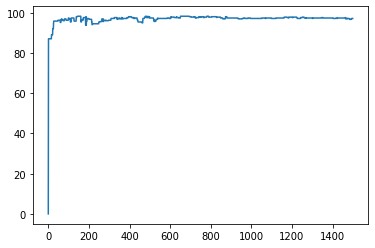

In [68]:
import matplotlib.pyplot as plt
iter = np.arange(0,num_iterations/1)
plt.plot(iter,accuracies)

In [69]:
optimized_bias = weights[-1]
optimized_weights = weights[0:-1]
print(optimized_weights)
print(optimized_bias)

[-0.19568594 -0.17343886 -0.19051381 -0.2091247  -0.04721622 -0.00445959
 -0.19377543 -0.23413327 -0.0285384   0.08847818 -0.22665209  0.04546709
 -0.17028146 -0.20559263  0.03144083  0.12872729  0.05327246  0.05596103
  0.05601305  0.13070514 -0.25128252 -0.25774316 -0.2242707  -0.24894574
 -0.19162029 -0.05683025 -0.17924163 -0.18494596 -0.25213345 -0.06823943]
0.25333333333333335


In [70]:
y_pred_train = np.sign(np.matmul(x_train[:,:-1],optimized_weights)+optimized_bias)

correct = 0
incorrect = 0

for i in range(len(y_pred_train)):
  if y_pred_train[i] == y_train[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)


y_pred_train_acc = []
y_train_acc = []
for i in range(len(y_pred_train)):

  if y_pred_train[i] == -1:
    y_pred_train_acc.append(-1)
  if y_pred_train[i] == 1:
    y_pred_train_acc.append(1)

  if y_train[i] == -1:
    y_train_acc.append(-1)
  
  if y_train[i] == 1:
    y_train_acc.append(1)

y_pred_train_acc = np.array(y_pred_train_acc)
y_train_acc = np.array(y_train_acc)
# print(y_pred_train_acc)
# print(y_train_acc)

442
13


In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train_acc, y_pred = y_pred_train_acc))
TN, FP, FN, TP = confusion_matrix(y_train_acc, y_pred_train_acc).ravel()
training_accuracy_lp = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy_lp:",training_accuracy_lp*100,"%")
print(accuracy_score(y_true = y_train_acc, y_pred = y_pred_train_acc))



confusion_matrix:
 [[158  11]
 [  2 284]]
158 11 2 284
training accuracy_lp: 97.14285714285714 %
0.9714285714285714


In [72]:
y_pred_test = np.sign(np.matmul(x_test[:,:-1],optimized_weights)+optimized_bias)
# y_test_true = np.array(y_test)
correct = 0
incorrect = 0

for i in range(len(y_pred_test)):
  if y_pred_test[i] == y_test[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)

y_pred_test_acc = []
y_test_acc = []
for i in range(len(y_pred_test)):

  if y_pred_test[i] == -1:
    y_pred_test_acc.append(-1)
  if y_pred_test[i] == 1:
    y_pred_test_acc.append(1)

  if y_test[i] == -1:
    y_test_acc.append(-1)
  
  if y_test[i] == 1:
    y_test_acc.append(1)

y_pred_test_acc = np.array(y_pred_test_acc)
y_test_acc = np.array(y_test_acc)
# print(y_pred_test_acc)
# print(y_test_acc)

112
2


In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test_acc, y_pred = y_pred_test_acc))
TN, FP, FN, TP = confusion_matrix(y_test_acc, y_pred_test_acc).ravel()
testing_accuracy = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy_lp:",testing_accuracy*100,"%")
print(accuracy_score(y_true = y_test_acc, y_pred = y_pred_test_acc))


confusion_matrix:
 [[41  2]
 [ 0 71]]
41 2 0 71
testing accuracy_lp: 98.24561403508771 %
0.9824561403508771


In [74]:
def finding_margin(y_pred_train,optimized_weights,optimized_bias):

  max_margin_distance = 2 / np.linalg.norm(optimized_weights)

  return max_margin_distance

max_margin_distance = finding_margin(y_pred_train,optimized_weights,optimized_bias)
print("max_margin_distance",max_margin_distance)
print("postive_margin_distance, negative_margin_distance:",max_margin_distance/2)

print("positive_support_vectors:",positive_sv)
print("negative_support_vectors:",negative_sv)

max_margin_distance 2.1867799077731696
postive_margin_distance, negative_margin_distance: 1.0933899538865848
positive_support_vectors: [array([ 0.02065018,  0.28863812,  0.0181635 , -0.10377876, -0.50173638,
        0.12240791, -0.47921466, -0.4730396 , -1.11579632, -0.38383187,
       -0.2070678 , -0.3607885 , -0.0579479 , -0.20521169, -0.97803262,
        0.41368661, -0.12214107,  0.27638303, -0.53786689, -0.3975058 ,
        0.03744263,  0.25774538,  0.14412734, -0.09155759, -0.74821703,
        0.56384216, -0.10069274,  0.29377857, -0.59333028, -0.29735115,
        1.        ]), array([-0.89671568, -0.48627523, -0.83364984, -0.80598769, -0.51312285,
        0.13188364,  0.07245077, -0.329883  , -1.17786235,  0.51067629,
       -0.53334039,  0.28874661, -0.02973116, -0.48815367,  0.50802763,
        1.16819539,  1.07449589,  0.95441944, -0.65168068,  0.4467512 ,
       -0.80952492,  0.1942363 , -0.50996967, -0.71051866,  0.29507718,
        0.97924139,  0.98690584,  0.62267307, -0.5

In [75]:
def find_all_support_vectors(x_train,weights,margin_distance):

  all_support_vectors = []
  for i in range(len(x_train)):
    distance = np.abs(round(np.sum(x_train[i]*weights),1))
    if distance <= margin_distance:
      all_support_vectors.append(x_train[i])
  
  all_support_vectors = np.array(all_support_vectors)

  return all_support_vectors

all_support_vectors = find_all_support_vectors(x_train,weights,max_margin_distance/2)
print(len(all_support_vectors))


82


**Regularization parameter = 0.01**

number_of_positive_suuport_vectors: 9
number_of_negative_suuport_vectors: 2
[-0.36491565 -0.4189945  -0.31918067 -0.42136985 -0.07439961  0.34350706
 -0.38209121 -0.60305621  0.22594185  0.32552292 -0.7778166   0.25448948
 -0.28488534 -0.65968822 -0.31516552  0.32646633  0.24749861  0.0939862
  0.00963952  0.72787099 -0.52647474 -0.89198598 -0.31580391 -0.55436349
 -0.53161704 -0.08855076 -0.52441407 -0.58436365 -0.7993491  -0.19995838]
0.4

metrics on train set

447
8
confusion_matrix:
 [[164   5]
 [  3 283]]
164 5 3 283
training accuracy_lp: 98.24175824175823 %
0.9824175824175824

metrics on test set

112
2
[ 1 -1 -1  1  1 -1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1  1 -1  1  1 -1  1
  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1
  1  1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1 -1  1  1  1 -1 -1  1  1 -1 -1
  1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1
 -1 -1  1 -1 -1  1 -1 -1  1  1  1 -1  1  1 -1  1  1 -1]
[ 1 -1 -1  1  1 -1 -1 -1  1  1  1 -

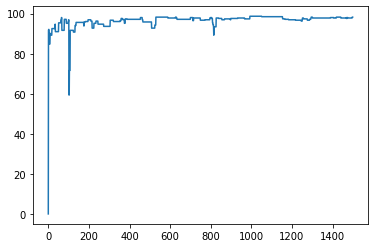

In [103]:
num_iterations = 1500
weights,accuracies,positive_sv,negative_sv,positive_sv_count,negative_sv_count = soft_svm_sgd(x_train,y_train,num_iterations,0.01)

print("number_of_positive_suuport_vectors:",positive_sv_count)
print("number_of_negative_suuport_vectors:",negative_sv_count)

iter = np.arange(0,num_iterations)
plt.plot(iter,accuracies)


optimized_bias = weights[-1]
optimized_weights = weights[0:-1]
print(optimized_weights)
print(optimized_bias)

### metrics on train set ###

print("\nmetrics on train set\n")

y_pred_train = np.sign(np.matmul(x_train[:,:-1],optimized_weights)+optimized_bias)

correct = 0
incorrect = 0

for i in range(len(y_pred_train)):
  if y_pred_train[i] == y_train[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)


y_pred_train_acc = []
y_train_acc = []
for i in range(len(y_pred_train)):

  if y_pred_train[i] == -1:
    y_pred_train_acc.append(-1)
  if y_pred_train[i] == 1:
    y_pred_train_acc.append(1)

  if y_train[i] == -1:
    y_train_acc.append(-1)
  
  if y_train[i] == 1:
    y_train_acc.append(1)

y_pred_train_acc = np.array(y_pred_train_acc)
y_train_acc = np.array(y_train_acc)
# print(y_pred_train_acc)
# print(y_train_acc)


from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train_acc, y_pred = y_pred_train_acc))
TN, FP, FN, TP = confusion_matrix(y_train_acc, y_pred_train_acc).ravel()
training_accuracy = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy_lp:",training_accuracy*100,"%")
print(accuracy_score(y_true = y_train_acc, y_pred = y_pred_train_acc))



### metrics on test set ###

print("\nmetrics on test set\n")

y_pred_test = np.sign(np.matmul(x_test[:,:-1],optimized_weights)+optimized_bias)
# y_test_true = np.array(y_test)
correct = 0
incorrect = 0

for i in range(len(y_pred_test)):
  if y_pred_test[i] == y_test[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)

y_pred_test_acc = []
y_test_acc = []
for i in range(len(y_pred_test)):

  if y_pred_test[i] == -1:
    y_pred_test_acc.append(-1)
  if y_pred_test[i] == 1:
    y_pred_test_acc.append(1)

  if y_test[i] == -1:
    y_test_acc.append(-1)
  
  if y_test[i] == 1:
    y_test_acc.append(1)

y_pred_test_acc = np.array(y_pred_test_acc)
y_test_acc = np.array(y_test_acc)
print(y_pred_test_acc)
print(y_test_acc)

from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test_acc, y_pred = y_pred_test_acc))
TN, FP, FN, TP = confusion_matrix(y_test_acc, y_pred_test_acc).ravel()
testing_accuracy = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy_lp:",testing_accuracy*100,"%")
print(accuracy_score(y_true = y_test_acc, y_pred = y_pred_test_acc))

def finding_margin(y_pred_train,optimized_weights,optimized_bias):

  max_margin_distance = 2 / np.linalg.norm(optimized_weights)

  return max_margin_distance

max_margin_distance = finding_margin(y_pred_train,optimized_weights,optimized_bias)
print("max_margin_distance",max_margin_distance)
print("postive_margin_distance, negative_margin_distance:",max_margin_distance/2)


print("positive_support_vectors:",positive_sv)
print("negative_support_vectors:",negative_sv)


In [104]:
def find_all_support_vectors(x_train,weights,margin_distance):

  all_support_vectors = []
  for i in range(len(x_train)):
    distance = np.abs(round(np.sum(x_train[i]*weights),1))
    if distance <= margin_distance:
      all_support_vectors.append(x_train[i])
  
  all_support_vectors = np.array(all_support_vectors)

  return all_support_vectors

all_support_vectors = find_all_support_vectors(x_train,weights,max_margin_distance/2)
print(len(all_support_vectors))


12


**Regularization parameter = 0.001**

number_of_positive_suuport_vectors: 8
number_of_negative_suuport_vectors: 3
[-0.30854514 -0.43018624 -0.28895768 -0.37511404 -0.07135788  0.35636113
 -0.30427276 -0.69474938  0.13965169  0.47730521 -0.65034214 -0.00931446
 -0.44368334 -0.49335777 -0.38852593  0.45583405  0.39536117 -0.18819862
  0.39894077  0.32449407 -0.53991081 -0.73794777 -0.4823964  -0.5760992
 -0.52280785  0.02783744 -0.29991781 -0.55392579 -0.47870251 -0.0937696 ]
0.13333333333333333

metrics on train set

442
13
confusion_matrix:
 [[163   6]
 [  7 279]]
163 6 7 279
training accuracy_lp: 97.14285714285714 %
0.9714285714285714

metrics on test set

111
3
[ 1 -1 -1  1  1 -1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1  1 -1  1  1 -1  1
  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1
  1  1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1 -1  1  1  1 -1 -1  1  1 -1 -1
  1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1
 -1 -1  1 -1 -1  1 -1 -1  1  1  1 -1  1  1 -1  1 -1 -1]
[ 1 -1 -1  1  1 -1

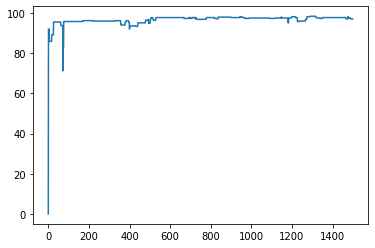

In [123]:
num_iterations = 1500
weights,accuracies,positive_sv,negative_sv,positive_sv_count,negative_sv_count = soft_svm_sgd(x_train,y_train,num_iterations,0.01)

print("number_of_positive_suuport_vectors:",positive_sv_count)
print("number_of_negative_suuport_vectors:",negative_sv_count)

iter = np.arange(0,num_iterations)
plt.plot(iter,accuracies)


optimized_bias = weights[-1]
optimized_weights = weights[0:-1]
print(optimized_weights)
print(optimized_bias)

### metrics on train set ###

print("\nmetrics on train set\n")

y_pred_train = np.sign(np.matmul(x_train[:,:-1],optimized_weights)+optimized_bias)

correct = 0
incorrect = 0

for i in range(len(y_pred_train)):
  if y_pred_train[i] == y_train[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)


y_pred_train_acc = []
y_train_acc = []
for i in range(len(y_pred_train)):

  if y_pred_train[i] == -1:
    y_pred_train_acc.append(-1)
  if y_pred_train[i] == 1:
    y_pred_train_acc.append(1)

  if y_train[i] == -1:
    y_train_acc.append(-1)
  
  if y_train[i] == 1:
    y_train_acc.append(1)

y_pred_train_acc = np.array(y_pred_train_acc)
y_train_acc = np.array(y_train_acc)
# print(y_pred_train_acc)
# print(y_train_acc)


from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train_acc, y_pred = y_pred_train_acc))
TN, FP, FN, TP = confusion_matrix(y_train_acc, y_pred_train_acc).ravel()
training_accuracy = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy_lp:",training_accuracy*100,"%")
print(accuracy_score(y_true = y_train_acc, y_pred = y_pred_train_acc))



### metrics on test set ###

print("\nmetrics on test set\n")

y_pred_test = np.sign(np.matmul(x_test[:,:-1],optimized_weights)+optimized_bias)
# y_test_true = np.array(y_test)
correct = 0
incorrect = 0

for i in range(len(y_pred_test)):
  if y_pred_test[i] == y_test[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)

y_pred_test_acc = []
y_test_acc = []
for i in range(len(y_pred_test)):

  if y_pred_test[i] == -1:
    y_pred_test_acc.append(-1)
  if y_pred_test[i] == 1:
    y_pred_test_acc.append(1)

  if y_test[i] == -1:
    y_test_acc.append(-1)
  
  if y_test[i] == 1:
    y_test_acc.append(1)

y_pred_test_acc = np.array(y_pred_test_acc)
y_test_acc = np.array(y_test_acc)
print(y_pred_test_acc)
print(y_test_acc)

from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test_acc, y_pred = y_pred_test_acc))
TN, FP, FN, TP = confusion_matrix(y_test_acc, y_pred_test_acc).ravel()
testing_accuracy = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy_lp:",testing_accuracy*100,"%")
print(accuracy_score(y_true = y_test_acc, y_pred = y_pred_test_acc))

def finding_margin(y_pred_train,optimized_weights,optimized_bias):

  max_margin_distance = 2 / np.linalg.norm(optimized_weights)

  return max_margin_distance

max_margin_distance = finding_margin(y_pred_train,optimized_weights,optimized_bias)
print("max_margin_distance",max_margin_distance)
print("postive_margin_distance, negative_margin_distance:",max_margin_distance/2)

print("positive_support_vectors:",positive_sv)
print("negative_support_vectors:",negative_sv)


In [124]:
def find_all_support_vectors(x_train,weights,margin_distance):
  y_s = []
  all_support_vectors = []
  for i in range(len(x_train)):
    distance = np.abs(round(np.sum(x_train[i]*weights),1))
    if distance <= margin_distance:
      all_support_vectors.append(x_train[i])
      y_s.append(y_train[i])
  
  all_support_vectors = np.array(all_support_vectors)

  return all_support_vectors,y_s

all_support_vectors,y_s = find_all_support_vectors(x_train,weights,max_margin_distance/2)
print(len(all_support_vectors))


17
